# ML Introduction Exercise

## Import and Load Data

In [98]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.cluster.hierarchy as sch

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

pd.options.display.max_rows = 50
url = 'https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/clustering/data/country.txt'
data = pd.read_csv(url)




## Check Data

In [99]:
# Display the first few rows of the dataset
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


In [100]:
data.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,151,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
unique,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mongolia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,37.905960,40.447013,6.790530,46.351430,17899.423841,7.857536,70.774172,2.934305,13636.324503
std,NaN,40.749021,28.196914,2.781353,24.614163,19801.730058,10.973978,9.011529,1.512132,18766.269648
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,7.850000,22.800000,4.850000,29.950000,3850.000000,1.730000,65.450000,1.820000,1485.000000
50%,NaN,19.100000,34.800000,6.220000,43.000000,10400.000000,5.140000,73.400000,2.410000,5020.000000
75%,NaN,60.400000,50.950000,8.690000,57.500000,26200.000000,10.350000,77.000000,3.750000,16850.000000


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   child_mort  151 non-null    float64
 2   exports     151 non-null    float64
 3   health      151 non-null    float64
 4   imports     151 non-null    float64
 5   income      151 non-null    int64  
 6   inflation   151 non-null    float64
 7   life_expec  151 non-null    float64
 8   total_fer   151 non-null    float64
 9   gdpp        151 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB


In [102]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Data is good

## Task 1 - Use K-means clustering and Hierarchical clustering to cluster the country into groups
please choose the number of the cluster in a rational reason

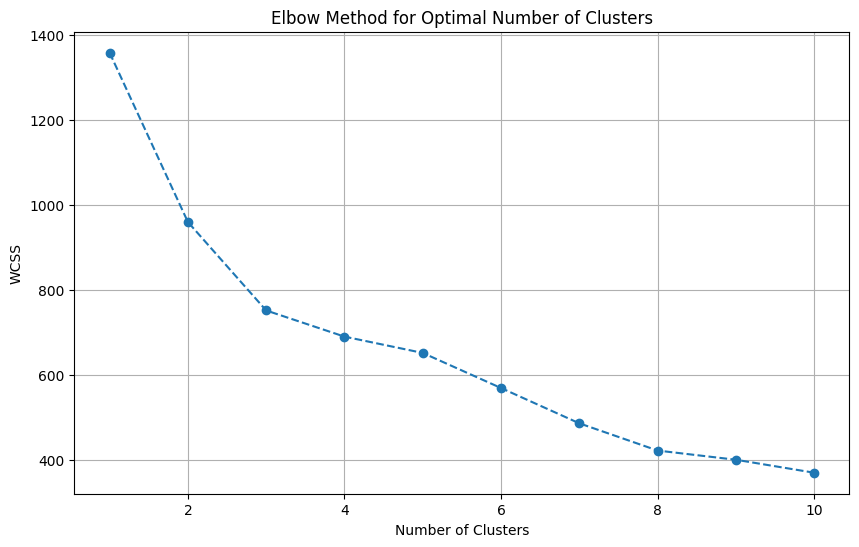

In [103]:
# Extract features and normalize them
features = data.drop(columns=['country'])
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Elbow Method for optimal number of clusters in K-means
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


The number of optimal clusters is where the graph breaks off (3), like an elbow.

In [104]:
# Apply K-means with the optimal number of clusters 
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

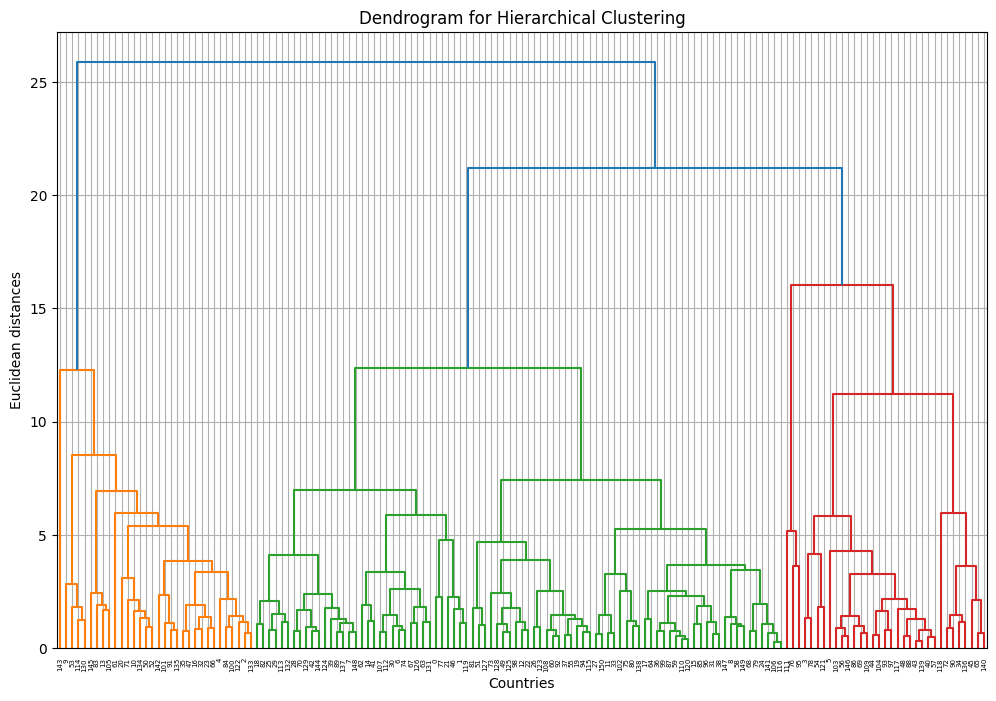

In [105]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(normalized_features, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.grid(True)
plt.show()

## Task 2 - Use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively

In [106]:
# Apply Hierarchical Clustering with the same number of clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_labels = hierarchical.fit_predict(normalized_features)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_features)

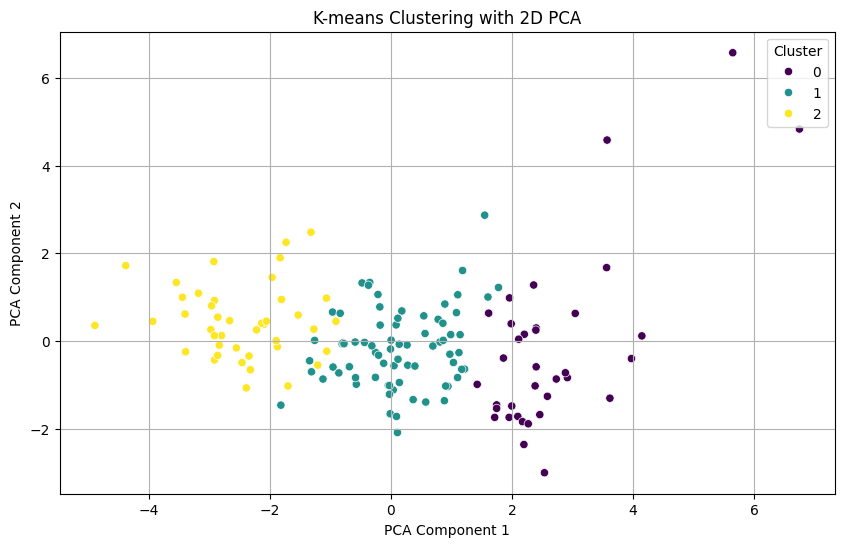

In [107]:
# Visualize K-means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering with 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

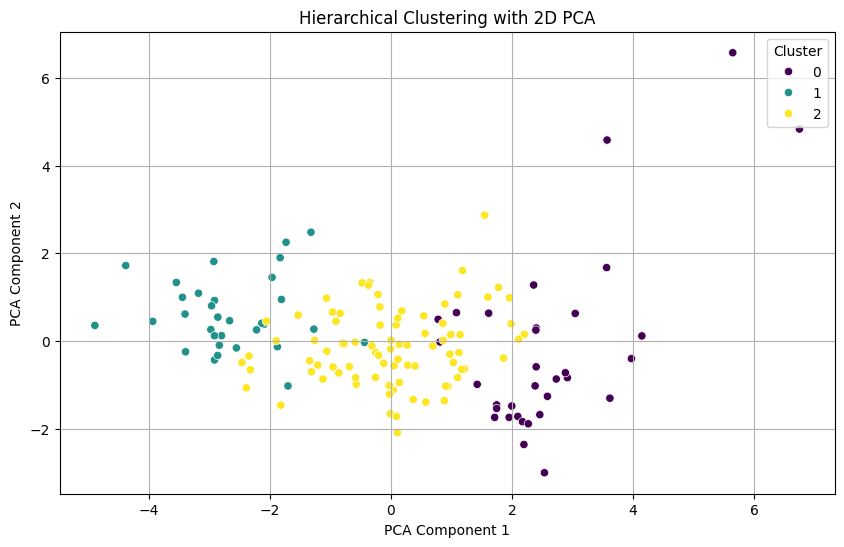

In [108]:
# Visualize Hierarchical Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title('Hierarchical Clustering with 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## Task 3 - Please write the suggestion to CEO about the country you suggest

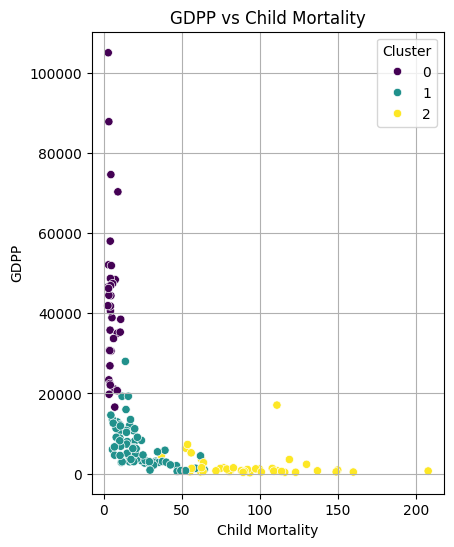

In [109]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='child_mort', y='gdpp', hue=kmeans_labels, palette='viridis')
plt.title('GDPP vs Child Mortality')
plt.xlabel('Child Mortality')
plt.ylabel('GDPP')
plt.legend(title='Cluster')
plt.grid(True)

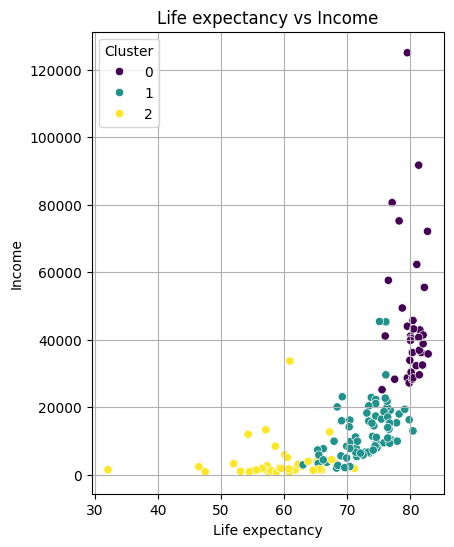

In [110]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='life_expec', y='income', hue=kmeans_labels, palette='viridis')
plt.title('Life expectancy vs Income')
plt.xlabel('Life expectancy')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.grid(True)

In [111]:
cluster_definitions = {
    2: 'Development_countries',  
    1: 'Emerging_countries',     
    0: 'Industrial_countries',     
}
#for cluster in range(optimal_clusters):
#    print(f"Cluster {cluster + 1}:")
#    cluster_countries = data['country'][kmeans_labels == cluster]
#    print(cluster_countries.tolist())
#    print("\n")

# Add cluster labels to the original data
data['Cluster'] = kmeans_labels
data['Category'] = data['Cluster'].map(cluster_definitions)

# Output development countries
development_countries = data[data['Category'] == 'Development_countries']
print("Development_countries")
development_countries

Development_countries


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Category
1,Sudan,76.7,19.70,6.32,17.2,3370,19.600,66.3,4.88,1480,2,Development_countries
2,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,2,Development_countries
4,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2,Development_countries
9,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,2,Development_countries
10,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,Development_countries
13,Mauritania,97.4,50.70,4.41,61.2,3320,18.900,68.2,4.98,1200,2,Development_countries
14,Pakistan,92.1,13.50,2.20,19.4,4280,10.900,65.3,3.85,1040,2,Development_countries
16,Kenya,62.2,20.70,4.75,33.6,2480,2.090,62.8,4.37,967,2,Development_countries
20,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,2,Development_countries
21,Timor-Leste,62.6,2.20,9.12,27.8,1850,26.500,71.1,6.23,3600,2,Development_countries


I would say that the investments should flow into the countries categorized as developing countries, as this is where life expectancy and child mortality are highest. However, the values improve when the economy in the countries improves, as can be seen in the other two clusters. An investment here could therefore bring a significant improvement for the people.